In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data_url="https://en.wikipedia.org/wiki/List_of_companies_of_the_United_Kingdom_A%E2%80%93J"

In [3]:
get_url=requests.get(data_url)
get_url

<Response [200]>

In [4]:
data_soup=BeautifulSoup(get_url.text,"html")
data_soup

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-appearance-disabled vector-feature-appearance-pinned-clientpref-0 vector-feature-night-mode-disabled skin-theme-clientpref-day vector-toc-not-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of companies of the United Kingdom A–J - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-me

In [5]:
data_soup.find("tr")

<tr>
<th>Rank
</th>
<th>Image
</th>
<th>Name
</th>
<th>2018 revenues (USD $M)
</th>
<th>Employees
</th>
<th>Notes
</th></tr>

In [6]:
data_soup.find_all("div")

[<div class="vector-header-container">
 <header class="vector-header mw-header">
 <div class="vector-header-start">
 <nav aria-label="Site" class="vector-main-menu-landmark" role="navigation">
 <div class="vector-dropdown vector-main-menu-dropdown vector-button-flush-left vector-button-flush-right" id="vector-main-menu-dropdown">
 <input aria-haspopup="true" aria-label="Main menu" class="vector-dropdown-checkbox" data-event-name="ui.dropdown-vector-main-menu-dropdown" id="vector-main-menu-dropdown-checkbox" role="button" type="checkbox"/>
 <label aria-hidden="true" class="vector-dropdown-label cdx-button cdx-button--fake-button cdx-button--fake-button--enabled cdx-button--weight-quiet cdx-button--icon-only" for="vector-main-menu-dropdown-checkbox" id="vector-main-menu-dropdown-label"><span class="vector-icon mw-ui-icon-menu mw-ui-icon-wikimedia-menu"></span>
 <span class="vector-dropdown-label-text">Main menu</span>
 </label>
 <div class="vector-dropdown-content">
 <div class="vector-u

In [7]:
table = data_soup.find("table", class_="wikitable sortable")
table

<table class="wikitable sortable">
<tbody><tr>
<th>Rank
</th>
<th>Image
</th>
<th>Name
</th>
<th>2018 revenues (USD $M)
</th>
<th>Employees
</th>
<th>Notes
</th></tr>
<tr>
<td>3
</td>
<td><span typeof="mw:File"><a class="mw-file-description" href="/wiki/File:Shell_Centre,_London,_UK,_June_2004.jpg"><img class="mw-file-element" data-file-height="640" data-file-width="423" decoding="async" height="151" src="//upload.wikimedia.org/wikipedia/commons/thumb/8/80/Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg/100px-Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/8/80/Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg/150px-Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/8/80/Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg/200px-Shell_Centre%2C_London%2C_UK%2C_June_2004.jpg 2x" width="100"/></a></span>
</td>
<td><a href="/wiki/Shell_plc" title="Shell plc">Shell</a>
</td>
<td align="right">$396,500


In [8]:
headers = []
header_row = table.find("tr")
for th in header_row.find_all("th"):
    headers.append(th.text.strip())

In [9]:
rows = []
for row in table.find_all("tr")[1:]:  
    cells = [cell.text.strip() for cell in row.find_all(["td", "th"])]
    rows.append(cells)

In [10]:
data=pd.DataFrame(rows,columns=headers)
data

,Rank,Image,Name,2018 revenues (USD $M),Employees,Notes
0,3,,Shell,"$396,500","81,000","British multinational oil, gas, and renewable ..."
1,7,,BP,"$303,738","73,000","British multinational oil, gas, and renewable ..."
2,99,,HSBC Holdings,"$86,131","235,200",British multinational investment bank and fina...
3,103,,Tesco,"$84,270","450,000",British multinational grocery and general merc...
4,167,,Unilever,"$60,167","154,800",British multinational consumer goods company w...


In [11]:
world_titles=data_soup.find_all("th")
world_titles

[<th>Rank
 </th>,
 <th>Image
 </th>,
 <th>Name
 </th>,
 <th>2018 revenues (USD $M)
 </th>,
 <th>Employees
 </th>,
 <th>Notes
 </th>]

In [12]:
worls_table_titles=[title.text for title in world_titles]
worls_table_titles

['Rank\n',
 'Image\n',
 'Name\n',
 '2018 revenues (USD $M)\n',
 'Employees\n',
 'Notes\n']

In [13]:
data.columns = data.columns.str.replace(r"[^\w\s]", "").str.replace(" ", "_")

revenue_counts = data["2018_revenues_USD_M"].value_counts()
print("\nRevenues Counts:")
print(revenue_counts)


Revenues Counts:
$396,500    1
$303,738    1
$86,131     1
$84,270     1
$60,167     1
Name: 2018_revenues_USD_M, dtype: int64


C:\Users\SWATHY KRISHNA\AppData\Local\Temp\ipykernel_4648\1219884341.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data.columns = data.columns.str.replace(r"[^\w\s]", "").str.replace(" ", "_")


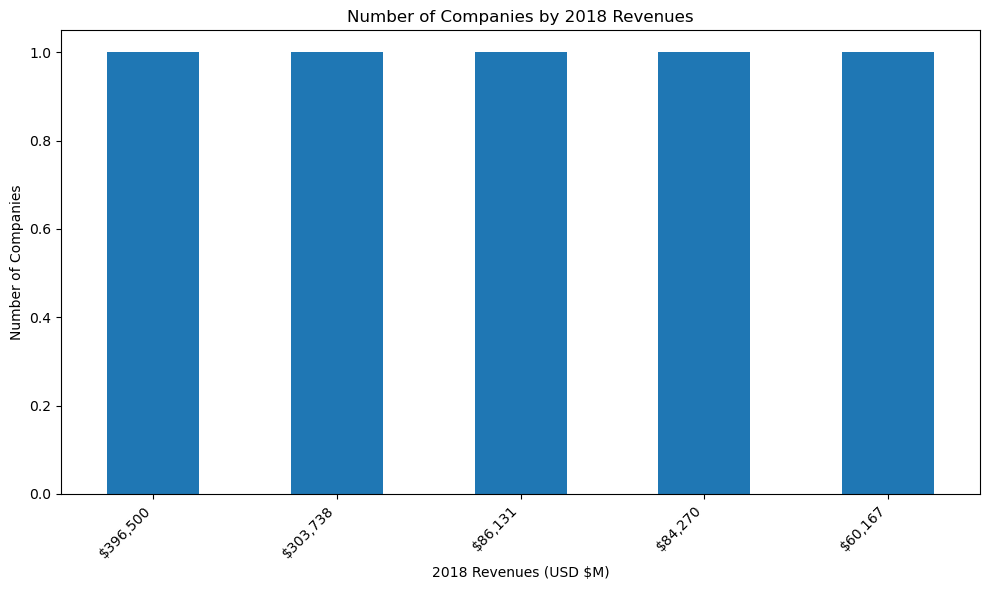

In [14]:
plt.figure(figsize=(10, 6))
revenue_counts.plot(kind="bar")
plt.title("Number of Companies by 2018 Revenues")
plt.xlabel("2018 Revenues (USD $M)")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [15]:
employee_counts = data["Employees"].value_counts()
print("\nEmployee Counts:")
print(employee_counts)


Employee Counts:
81,000     1
73,000     1
235,200    1
450,000    1
154,800    1
Name: Employees, dtype: int64


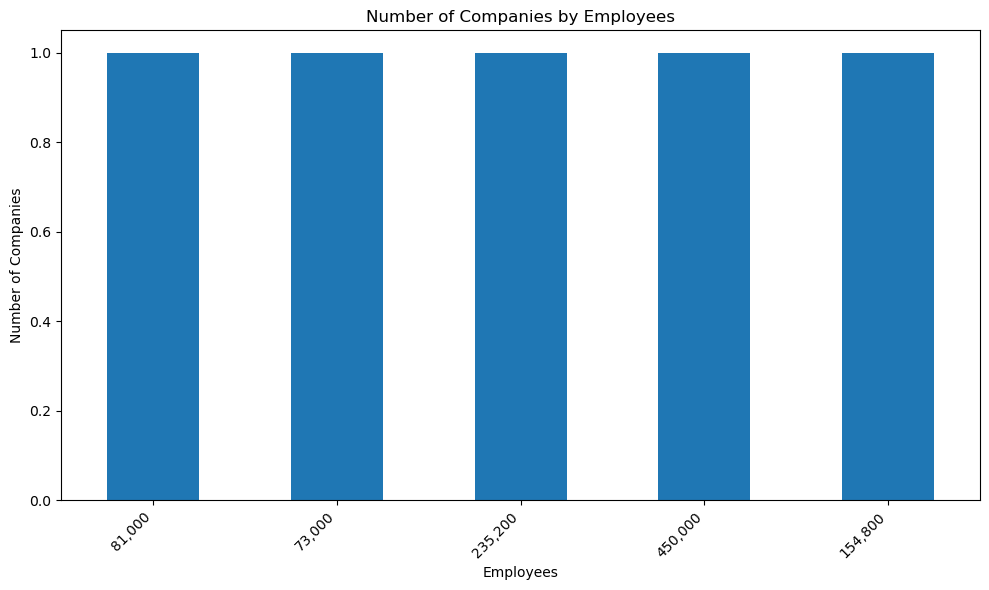

In [16]:
plt.figure(figsize=(10, 6))
employee_counts.plot(kind="bar")
plt.title("Number of Companies by Employees")
plt.xlabel("Employees")
plt.ylabel("Number of Companies")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [17]:
data.to_csv("companies_data.csv", index=False)